In [5]:
!pip install tensorflow opencv-python matplotlib labelme albumentations

You should consider upgrading via the 'C:\Users\Hrvoje\source\repos\DeepLearningIris\DeepLearningIris\Scripts\python.exe -m pip install --upgrade pip' command.


COLLECT IMAGES

In [5]:
import os
import time
import uuid
import cv2

In [9]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 30

In [23]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.3)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [24]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\Hrvoje\.labelmerc


In [13]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [14]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [15]:
images.as_numpy_iterator().next()

b'data\\images\\8251c71f-91e1-11ee-9ac7-70665558167c.jpg'

In [16]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [17]:
images = images.map(load_image)

In [18]:
images.as_numpy_iterator().next()

array([[[155, 148, 132],
        [154, 147, 131],
        [153, 144, 129],
        ...,
        [153, 140, 147],
        [155, 140, 147],
        [154, 139, 146]],

       [[153, 146, 130],
        [152, 145, 129],
        [152, 143, 128],
        ...,
        [152, 139, 146],
        [152, 139, 146],
        [153, 140, 147]],

       [[152, 146, 130],
        [151, 145, 129],
        [151, 144, 128],
        ...,
        [150, 139, 143],
        [151, 140, 144],
        [152, 141, 145]],

       ...,

       [[ 64,  69,  75],
        [ 63,  68,  74],
        [ 62,  67,  73],
        ...,
        [133, 126, 142],
        [131, 124, 140],
        [130, 123, 139]],

       [[ 62,  65,  72],
        [ 61,  64,  71],
        [ 59,  62,  69],
        ...,
        [133, 129, 144],
        [132, 128, 143],
        [130, 126, 141]],

       [[ 58,  61,  68],
        [ 57,  60,  67],
        [ 55,  58,  65],
        ...,
        [133, 129, 144],
        [133, 129, 144],
        [131, 127, 142]]

In [19]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [20]:
image_generator = images.batch(4).as_numpy_iterator()

In [21]:
plot_images = image_generator.next()

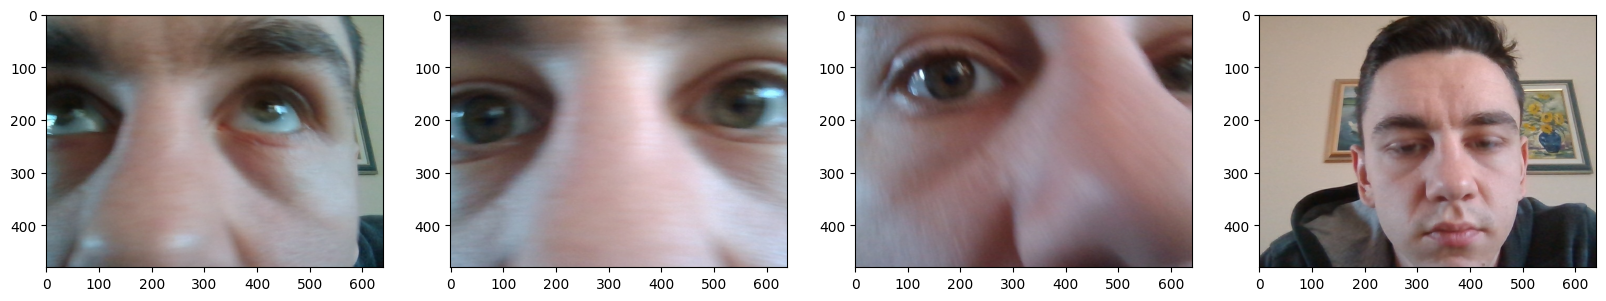

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [2]:
import os
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [3]:
import albumentations as alb